In [1]:
import os
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tomli

from generate_data import DatasetGenerationConfig
from models import ModelConfig
from system import SimulationConfig, simulate_system
from train import ModelTrainingConfig
from unicycle import Unicycle
from utils import plot_trajectory

base_path = Path(os.getcwd()).parent

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "times",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/bel fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

plt.rcParams.update(tex_fonts)

Load general config settings

In [3]:
config = 'configs/config.toml'
abs_config_path = (base_path / config).resolve()
with open(abs_config_path, 'rb') as f:
    data = tomli.load(f)
    simulation_cfg = SimulationConfig(**data['simulation'])
    dataset_cfg = DatasetGenerationConfig(**data['dataset'])
    model_cfg = ModelConfig(**data['training']['model'])
    data['training']['model'] = model_cfg
    training_cfg = ModelTrainingConfig(**data['training'])

Evaluate trained models

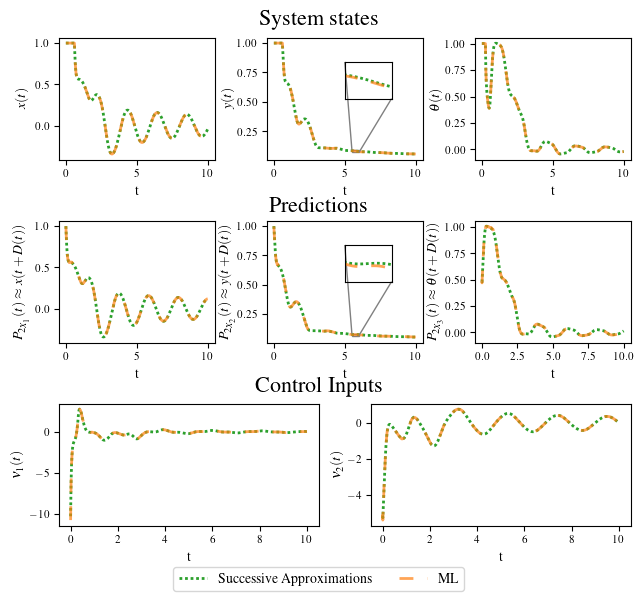

In [4]:
# Initial conditions
init_state = np.ones(3, dtype=np.float32)
init_inputs = [np.zeros(NDi, dtype=np.float32) for NDi in simulation_cfg.NDs]

# Exact predictor feedback simualtion
unicycle = Unicycle(init_state, init_inputs, simulation_cfg)
states, controls, predictors, _ = simulate_system(unicycle)

# ML approximated predictor feedback simualtion
model_cfg.path = (base_path / f'models/{model_cfg.path}.pth').resolve()
ml_unicycle = Unicycle(init_state, init_inputs, simulation_cfg, model_cfg)
ml_states, ml_controls, _, ml_predictors = simulate_system(ml_unicycle)

# Visualize
plot_trajectory(simulation_cfg.t, states, ml_states, controls, ml_controls, predictors, ml_predictors, savefig='single_trajectory', axis=True)